In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datamodules import data_processors
from sklearn.feature_selection import mutual_info_regression
import sys
print(sys.version)

3.13.3 (main, Apr 22 2025, 00:00:00) [GCC 14.2.1 20250110 (Red Hat 14.2.1-7)]


In [2]:
N_archivos = 24
key_features = "x_"
path_rand = map(lambda x: "../input_data/cubic_" + str(x + 1) + ".csv", range(N_archivos))
datos_rand = (pd.read_csv(x) for x in path_rand)
datos_full = pd.concat(datos_rand, axis = 0)

In [3]:
datos_full.head()

,phi_a,x_K,eta,beta,phi_K,eig_0,eig_1,eig_2,eig_3,eig_4,...,eig_13,eig_14,eig_15,eig_16,eig_17,eig_18,eig_19,Parallelepiped,Cylinder,Ellipsoid
0,0.316161,0.791562,0.754219,1.079462,0.657435,1.736415e-02,1.629389,5.044272,8.274985,9.185125,...,47.294640,50.892119,61.676087,67.686968,70.778825,76.396048,92.835436,1,0,0
1,0.162405,0.104911,0.828890,1.373335,1.465692,3.177664e-02,1.047746,3.950982,4.348263,5.880573,...,28.786214,31.649901,38.895047,38.963232,42.272595,46.856592,47.964771,1,0,0
2,1.355693,0.642695,0.841161,0.034810,0.872785,6.691898e-07,5.350016,7.923618,22.595121,25.510283,...,264.812641,279.601548,290.574747,459.286176,497.984950,799.584737,802.055305,1,0,0
3,0.555174,0.438063,1.474294,0.895600,1.117354,1.032200e-01,2.911877,4.757121,5.737617,7.033677,...,25.161163,26.744524,33.772593,34.466781,34.553154,38.837243,39.132344,1,0,0
4,0.043034,0.198572,0.605128,1.433838,1.370896,5.034018e-03,2.609075,5.267032,6.527812,10.881385,...,68.203260,74.176432,83.230425,89.100341,90.705921,90.988829,93.832138,1,0,0


In [4]:
N_eig = 19
features = ["eta", "beta"] + list(map(lambda x: key_features + str(x), range(N_eig + 1)))
target = ["phi_a", "phi_K"]
datos_full = data_processors.preprocess_data(datos_full, N_eig, target)
X = datos_full[features]
y = datos_full[target]

In [5]:
X.head()

,eta,beta,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19
0,0.754219,1.079462,0.010772,0.006780,0.036784,0.034800,0.009804,0.061399,0.046644,0.069853,...,0.037703,0.024283,0.019019,0.028045,0.038751,0.116162,0.064748,0.033305,0.060507,0.177081
1,0.828890,1.373335,0.020849,0.000995,0.060529,0.008283,0.031947,0.102965,0.007217,0.026914,...,0.038748,0.000157,0.023408,0.065450,0.059704,0.151051,0.001422,0.068996,0.095570,0.023104
2,0.841161,0.034810,0.001247,0.005424,0.003209,0.018292,0.003635,0.009327,0.020003,0.009830,...,0.026346,0.086333,0.053014,0.017997,0.018439,0.013681,0.210349,0.048250,0.376034,0.003080
3,1.474294,0.895600,0.025554,0.048857,0.047154,0.025056,0.033120,0.093392,0.049965,0.064712,...,0.026038,0.068974,0.010208,0.081517,0.040462,0.179597,0.017740,0.002207,0.109477,0.007541
4,0.605128,1.433838,0.010657,0.017148,0.028327,0.013437,0.046397,0.039468,0.006966,0.110051,...,0.019437,0.190799,0.057693,0.106439,0.063658,0.096491,0.062558,0.017111,0.003015,0.030302


In [6]:
y.head()

,phi_a,phi_K
0,0.201275,0.418536
1,0.103390,0.933089
2,0.863061,0.555632
3,0.353435,0.711329
4,0.027397,0.872739


In [7]:
MI_data = dict()
for key in target:
    MI_data[key] = mutual_info_regression(X, y[key], n_jobs=-1)
    print("Finished: " + key)
#fin for

Finished: phi_a
Finished: phi_K


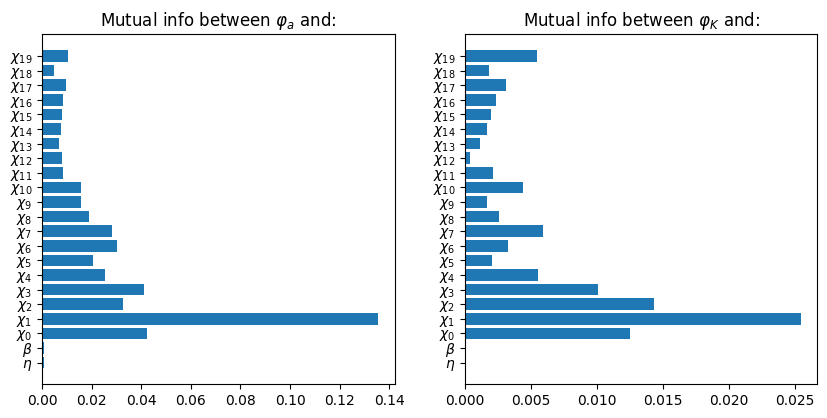

Exception ignored in: <function ResourceTracker.__del__ at 0x7f859f5900e0>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7fd1d4b940e0>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib64/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7fe2dea7c0e0>
Traceback (most recent call last):
  File "/usr/lib64/python3.13/multip

In [ ]:
symbols_comp = dict(map(lambda x: ("x_" + str(x), r"$\chi_{%d}$" % x), range(N_eig+1)))
symbols_target = {"phi_K": r"$\varphi_K$", "phi_a": r"$\varphi_a$"}
symbols_features = {"eta": r"$\eta$", "beta": r"$\beta$", **symbols_comp}
fig = plt.figure(figsize=(10,10))
dim = int(np.ceil(len(MI_data.keys())**0.5))
for i,key in enumerate(target):
    ax = fig.add_subplot(dim,dim,i+1)
    ax.barh(symbols_features.values(), MI_data[key])
    ax.set_title("Mutual info between " + symbols_target[key] + " and:")
